<font size="6"><center>**Suicide Statistics in Lithuania**</center></font>

<center>Author Laima Lukoseviciute</center>

# Table of Contents
* [Introduction](#Introduction)
* [Data Preparation and Cleaning](#Data-Preparation-and-Cleaning)
  * [Importing the Data](#Importing-the-Data)
  * [Duplicate and Missing Values](#Duplicate-and-Missing-Values)
  * [Observations and Features](#Observations-and-Features)
  * [Outliers](#Outliers)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Vizualizing the Counts and the Rates](#Vizualizing-the-Counts-and-the-Rates)
* [Summary](#Summary)

# Introduction

The following analysis examines suicide statistics in Lithuania from 2001 to 2024. The data was sourced from the [Lithuanian Institute of Hygiene](https://www.hi.lt/) 
(HI) database, accessible [here](https://stat.hi.lt/default.aspx?report_id=244). This dataset includes annual counts and rates of suicides overall, as well as broken down by gender. The aim of this analysis is to explore trends over time, focusing on changes in suicide counts and rates among both males and females. The dataset contains these variables:

- `year`: Calendar year.
- `suicide_count`: Total number of suicides.
- `suicide_count_female`: Number of suicides among females.
- `suicide_count_male`: Number of suicides among males.
- `suicide_rate`: Suicide rate per 100,000 habitants.
- `suicide_rate_female`: Suicide rate per 100,000 habitants.
- `suicide_rate_male`: Suicide rate per 100,000 habitants.

# Data Preparation and Cleaning
## Importing the Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Setting plotting style
plt.style.use("fast")

In [3]:
df = pd.read_csv("suicide_lithuania_2024.csv")
print(df.shape)
df.head()

(24, 7)


,year,suicide_count,suicide_count_female,suicide_count_male,suicide_rate,suicide_rate_female,suicide_rate_male
0,2001,1535.0,278.0,1257.0,44.23,15.04,77.49
1,2002,1551.0,243.0,1308.0,45.05,13.24,81.38
2,2003,1455.0,256.0,1199.0,42.60,14.05,75.29
3,2004,1381.0,257.0,1124.0,40.89,14.25,71.45
4,2005,1319.0,235.0,1084.0,39.70,13.22,70.15


## Duplicate and Missing Values

From the code below we can see that data have some missing values and  duplicated values.

In [4]:
# Checking for missing values
df.isna().sum()

year                    0
suicide_count           0
suicide_count_female    0
suicide_count_male      0
suicide_rate            0
suicide_rate_female     0
suicide_rate_male       0
dtype: int64

In [5]:
# Checking for duplicated values
df.duplicated().sum()

0

## Observations and Features

In [6]:
df.describe().round(2)

,year,suicide_count,suicide_count_female,suicide_count_male,suicide_rate,suicide_rate_female,suicide_rate_male
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,2012.50,965.71,176.50,789.21,31.07,10.62,54.73
std,7.07,318.88,50.84,269.71,8.12,2.35,14.90
min,2001.00,527.00,101.00,426.00,18.61,6.69,32.24
25%,2006.75,676.75,132.00,542.00,24.02,8.71,41.78
50%,2012.50,974.00,175.50,793.00,31.69,10.77,56.42
75%,2018.25,1117.75,198.75,926.50,36.14,12.33,65.09
max,2024.00,1551.00,278.00,1308.00,45.05,15.04,81.38


# Exploratory Data Analysis
## Vizualizing the Counts and the Rates

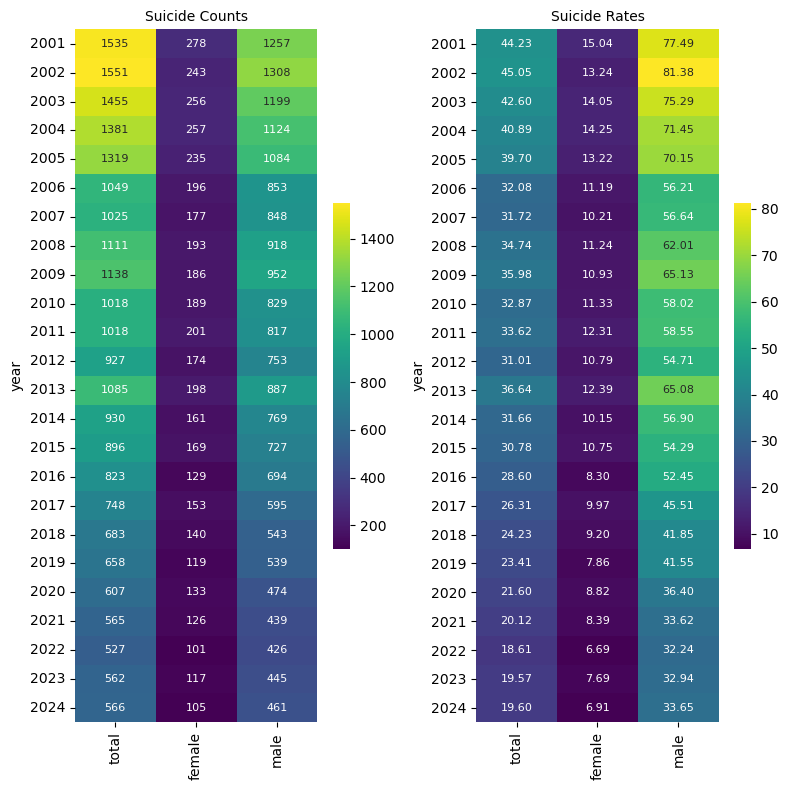

In [7]:
data_counts = df[["year", "suicide_count", "suicide_count_female", "suicide_count_male"]].set_index("year")
data_rates = df[["year", "suicide_rate", "suicide_rate_female", "suicide_rate_male"]].set_index("year")

fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

sns.heatmap(
    data_counts,
    ax=axes[0],
    annot=True,
    cmap="viridis",
    fmt=".0f",
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 8}
)
axes[0].set_title("Suicide Counts", fontsize=10)
axes[0].set_xticklabels(["total", "female", "male"], fontsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.heatmap(
    data_rates,
    ax=axes[1],
    annot=True,
    cmap="viridis",
    fmt=".2f",
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 8}
)
axes[1].set_title("Suicide Rates", fontsize=10)
axes[1].set_xticklabels(["total", "female", "male"], fontsize=10)
axes[1].tick_params(axis='y', labelsize=10, labelleft=True)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

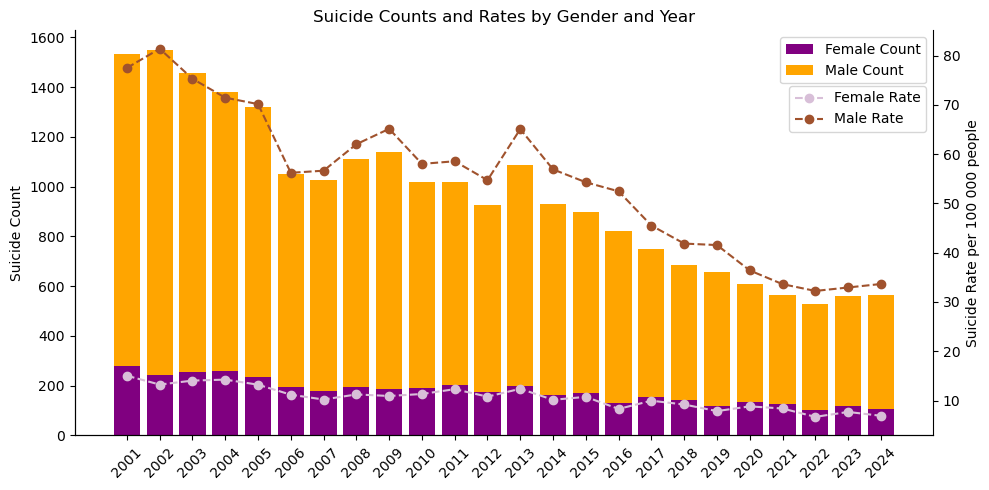

In [8]:
x = np.arange(len(df))
years = df["year"]

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(x, df["suicide_count_female"], label="Female Count", color="purple")
ax1.bar(x, df["suicide_count_male"], bottom=df["suicide_count_female"], label="Male Count", color="orange")
ax1.set_ylabel("Suicide Count")
ax1.set_xticks(x)
ax1.set_xticklabels(years, rotation=45)
ax1.set_title("Suicide Counts and Rates by Gender and Year")

for spine in ["top", "right"]:
    ax1.spines[spine].set_visible(False)

ax1.grid(False)
ax1.legend(loc="upper right", bbox_to_anchor=(1, 1))

ax2 = ax1.twinx()
ax2.plot(x, df["suicide_rate_female"], label="Female Rate", color="thistle", marker="o", linestyle="--")
ax2.plot(x, df["suicide_rate_male"], label="Male Rate", color="sienna", marker="o", linestyle="--")
ax2.set_ylabel("Suicide Rate per 100 000 people")

ax2.spines["top"].set_visible(False)
ax2.legend(loc="upper right", bbox_to_anchor=(1, 0.88))

plt.tight_layout()
plt.show()

# Summary

Over the past two decades (from 2001 to 2024), **suicide rates in Lithuania have declined significantly** for both men and women. This downward trend is particularly **pronounced among males**, who historically have had disproportionately higher suicide rates.

- In **2001**, Lithuania reported **1535 suicides** — with a **total suicide rate of 44.23 per 100000** habitants.
- By **2024**, the number had dropped to **566 suicides**, with the rate more than halving to **19.60 per 100000** habitants.

- **Male suicide rate** fell dramatically:  
  From the highest count of **1551** (with rate **81.38** per 100000 habitants) in 2002 to **527** (with rate **32.24** per 100000 habitants) in 2022.
- **Female suicide rate** also declined:  
  From the highest count of **278** (with rate **15.04** per 100000 habitants) in 2001 to **101** (with rate **6.69** per 100000 habitants) in 2022.

